In [101]:
import csv, os
import numpy as np
import pandas as pa
import re
from matplotlib import pyplot as plt
import random
import math
import operator
%matplotlib inline

PATH = 'data/z_scores.csv'
train = []
test = []

In [102]:
# load data and split into training & test sets
def loadDataSet(filename, split, train=[], test=[]):
    with open(filename, 'r') as file:
        lines = csv.reader(file)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(3):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                train.append(dataset[x])
            else:
                test.append(dataset[x])

In [103]:
def distance(x1, x2, length):
    """Calculate the Euclidean Distance"""
    distance = 0
    for x in range(length):
        distance += pow((x1[x] - x2[x]), 2)
    return math.sqrt(distance)

In [104]:
def KNeighbors(train, test, k):
    """Calculate the distance between all the training and
    unseen instance and return the k most similiar 
    (smallest distance values) neighbors from the training set """
    
    distances = []
    length = len(test)-1
    for x in range(len(train)):
        dist = distance(test, train[x], length)
        distances.append((train[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors 

In [105]:
def getResponse(neighbors):
    """Majority class voting - count the class 
    attribute of neighbors and take the 
    majority vote as the prediction"""
    
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [131]:
def accuracy_(test, pred):
    """Classification Accuracy - the 
    ratio of total correct predictions"""
    correct = 0
    for x in range(len(test)):
        if test[x][-1] == pred[x]:
            correct += 1
    result = (correct/float(len(test))) * 100.0
    return result

In [140]:
def main():
    # generate predictions
    k_ = 30
    accuracy = []
    
    train = []
    test = []
    split = 0.7
    filename = PATH
    loadDataSet(filename, split, train, test)
    print("Train: " + repr(len(train)))
    print("Test: "  + repr(len(test)))
    for k in range(1, k_):
        pred = []
        for x in range(len(test)):
            neighbors = KNeighbors(train, test[x], k)
            result = getResponse(neighbors)
            pred.append(result)
            print("Predicted: " + repr(result) + " | Actual: " + repr(test[x][-1]))
        acc = accuracy_(test, pred)
        accuracy.append(acc)
        print("Accuracy: " + repr(acc) + '%')
    
    return accuracy

In [151]:
def main2():
    # generate predictions
    k_ = 5
    accuracy = []
    for k in range(1, 10):
        pred = []
        train = []
        test = []
        split = 0.7
        filename = PATH
        loadDataSet(filename, split, train, test)
        print("Train: " + repr(len(train)))
        print("Test: "  + repr(len(test)))
        for x in range(len(test)):
            neighbors = KNeighbors(train, test[x], k_)
            result = getResponse(neighbors)
            pred.append(result)
            print("Predicted: " + repr(result) + " | Actual: " + repr(test[x][-1]))
        acc = accuracy_(test, pred)
        accuracy.append(acc)
        print("Accuracy: " + repr(acc) + '%')
    
    return accuracy

In [152]:
acc = main2()

Train: 45
Test: 18
Predicted: 'female' | Actual: 'male'
Predicted: 'male' | Actual: 'female'
Predicted: 'male' | Actual: 'male'
Predicted: 'male' | Actual: 'male'
Predicted: 'male' | Actual: 'male'
Predicted: 'male' | Actual: 'male'
Predicted: 'male' | Actual: 'male'
Predicted: 'male' | Actual: 'male'
Predicted: 'male' | Actual: 'male'
Predicted: 'male' | Actual: 'male'
Predicted: 'male' | Actual: 'male'
Predicted: 'male' | Actual: 'male'
Predicted: 'male' | Actual: 'male'
Predicted: 'male' | Actual: 'male'
Predicted: 'male' | Actual: 'male'
Predicted: 'male' | Actual: 'male'
Predicted: 'male' | Actual: 'male'
Predicted: 'female' | Actual: 'female'
Accuracy: 88.88888888888889%
Train: 48
Test: 15
Predicted: 'male' | Actual: 'male'
Predicted: 'male' | Actual: 'male'
Predicted: 'male' | Actual: 'male'
Predicted: 'male' | Actual: 'male'
Predicted: 'male' | Actual: 'male'
Predicted: 'male' | Actual: 'male'
Predicted: 'male' | Actual: 'male'
Predicted: 'female' | Actual: 'female'
Predicted: 

In [153]:
k = [x for x in range(1, 10)]

In [154]:
def plot(acc, k):
    
    plt.figure(figsize=(8,6))
    plt.plot(k, acc)
    
    
    plt.title('KNN Classification')
    plt.xlabel('Fold - Different Split')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout

/Users/richardbanyi/Developer/Environments/Data/lib/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


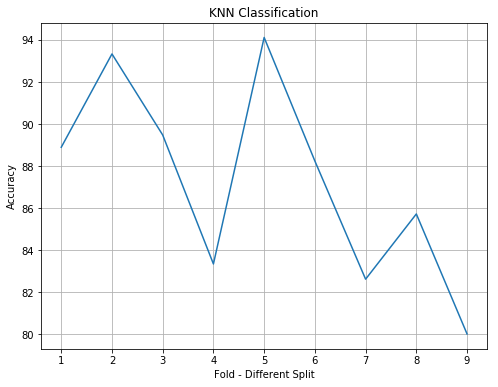

In [155]:
plot(acc, k)